In [1]:
'''
课程2.4 分布数据可视化 - 直方图与密度图 
distplot() / kdeplot() / rugplot() 

'''

'\n课程2.4 分布数据可视化 - 直方图与密度图 \ndistplot() / kdeplot() / rugplot() \n\n'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline  
sns.set_style('darkgrid') 
sns.set_context('paper')
# 设置风格，尺度 

In [3]:
import warnings 
warnings.filterwarnings('ignore') 
# 不发出警告

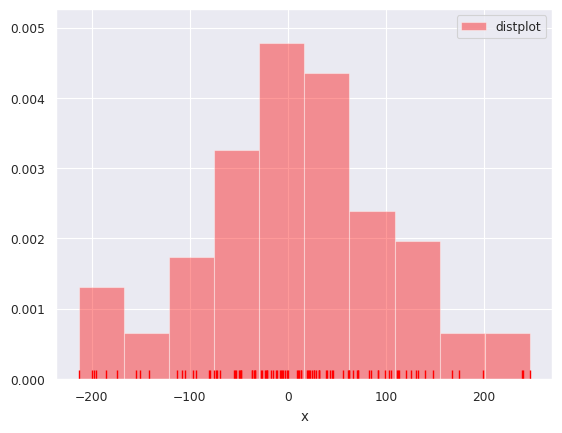

In [4]:
#1.直方图 - distplot() 
rs=np.random.RandomState(10) # 设定随机种子 
s=pd.Series(rs.randn(100)*100) 
sns.distplot(s,bins=10,hist=True,kde=False  , norm_hist=True,rug=True  ,
             vertical=False  ,
             color='r',
             label='distplot',
             axlabel='x')
'''
bins -> 箱数 
hist，kde -> 是否显示箱/密度曲线 
norm_hist -> 直方图是否按照密度来显示 
rug -> 是否显示数据分布情况 
vertical -> 是否水平显示 
color -> 设置颜色 
label -> 图列 
axlabel -> x轴标注 
'''
plt.legend()


<AxesSubplot:ylabel='Density'>

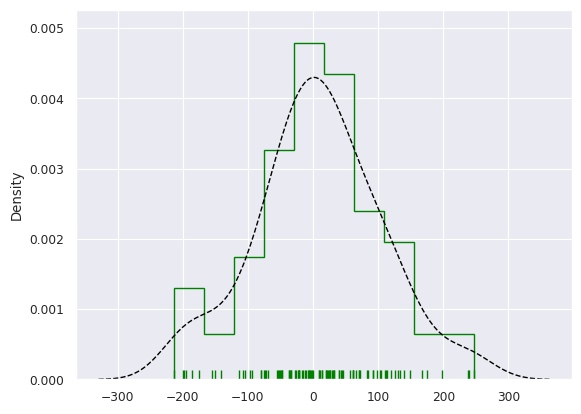

In [5]:
'''
颜色 详细设置 

'''
sns.distplot(s,rug=True, 
            rug_kws={'color':'g'}, 
             # 设置数据频率分布颜色 
            kde_kws={'color':'k','lw':1,'label':'KDE','linestyle':'--'},
             # 设置密度曲线颜色，线宽，标注，线形 
            hist_kws={'histtype':'step','linewidth':1,'alpha':1,'color':'g' })
             #设置箱子的风格、线宽、透明度、颜色 
             #风格包括:'bar','barstacked','step','stepfilled' 
            

<AxesSubplot:ylabel='Density'>

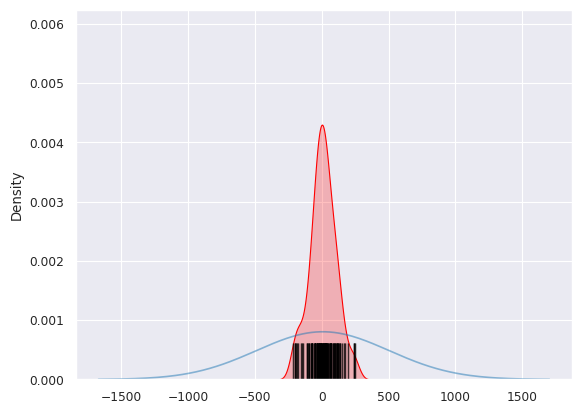

In [6]:
'''
2. 密度图 -kdeplot() 
单个样本数据密度分布图 

'''
sns.kdeplot(s, 
           shade=True  , # 是否充足
           color='r', # 设置颜色  
            vertical=False   # 设置是否水平
           )
sns.rugplot(s,height=0.1,color='k',alpha=0.5)
# 数据频率分布图 

sns.kdeplot(s,bw=5,label='bw:0.2',
           linestyle='-',linewidth=1.2,alpha=0.5)
# bw -> 控制拟合的程度，类似直方图的箱数  

sns.rugplot(s,height=0.1,color='k',alpha=0.5)
# 数据频率分布图 

<AxesSubplot:xlabel='A', ylabel='B'>

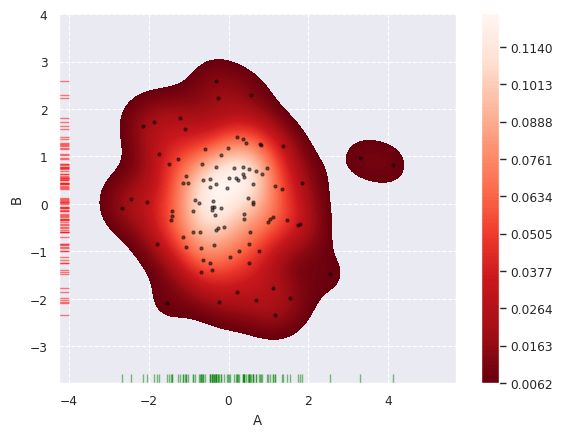

In [8]:
#2 .密度图--kdeplot() 
rs= np.random.RandomState(2) # 设定随机数种子 
df=pd.DataFrame(rs.randn(100,2), 
            columns=['A','B'])

sns.kdeplot(
    x=df['A'],
    y=df['B'],
    cbar=True,  # 是否显示颜色图例 
    shade=True, # 是否填充 
    cmap='Reds_r', # 设置调色盘 
    shade_lowest=False,  # 最外围颜色是否显示  
    n_levels=100   # 曲线个数（如果非常多，则会越平滑 ) 
)

# sns.kdeplot(
#    df['A'],
#    df['B']
# )
# sns.kdeplot(df['A'],df['B'],shade=True)
# 两个维度数据生成曲线密度图，以颜色作为密度衰减显示 
plt.grid(linestyle='--')
plt.scatter(df['A'],df['B'],s=5,alpha=0.5,color='k') 

sns.rugplot(df['A'],color='g',axis='x',alpha=0.5 )
sns.rugplot(df['B'],color='r',axis='y',alpha=0.5 )

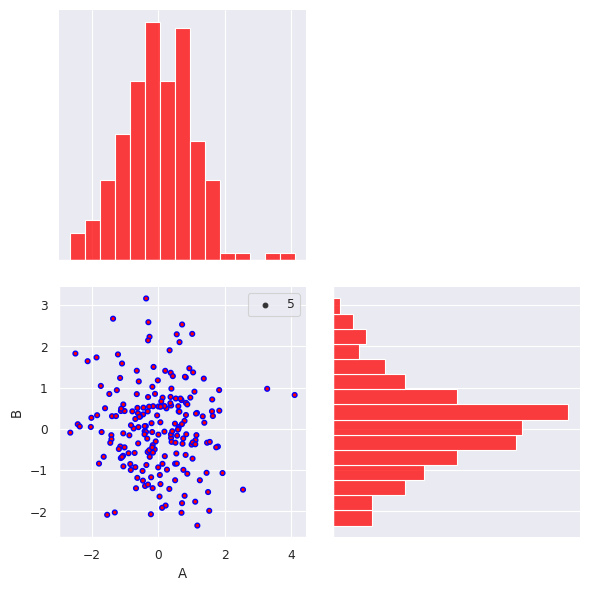

In [30]:
rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(200, 2), columns=['A', 'B'])
# 创建数据
sns.jointplot(
    x=df['A'],
    y=df['B'],  # 设置 XY 轴，显示columns 名称
    data=df,  # 设置数据
    color='r',  # 设置颜色
    s=50,  #设置散点大小，
    edgecolor='b', linewidth=1,  # 边缘线颜色及宽度（只针对 scatter)
    kind='scatter',  # 设置类型 ： 'scatter','reg','resid','kde','hex'
    space=.11,  # 设置散点图和布局图的间距
    size=5,  # 图表大小
    ratio=1,  # 散点图与布局图高度比，整形
    marginal_kws=dict(bins=15, rug=False)  # 设置柱状图箱数 ，是否设置rug

)

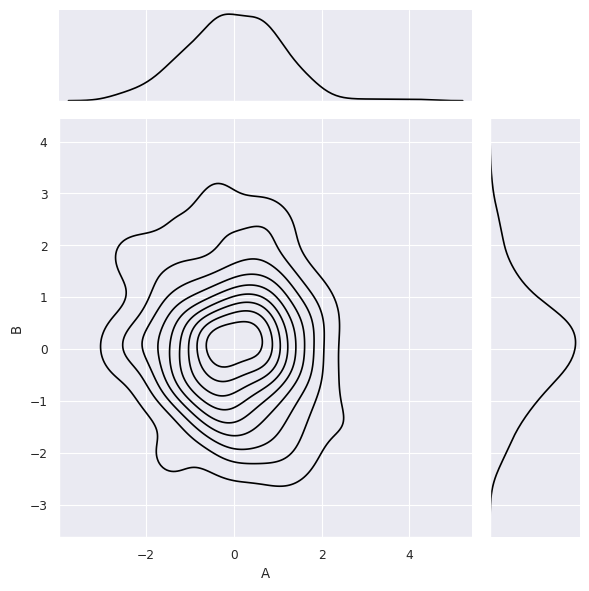

In [44]:
sns.jointplot(
    x=df['A'],
    y=df['B'],  # 设置 XY 轴，显示columns 名称
    data=df,  # 设置数据
    color='k',  # 设置颜色
#     s=50,  #设置散点大小，
#     edgecolor='b', linewidth=1,  # 边缘线颜色及宽度（只针对 scatter)
    kind='kde',  # 设置类型 ： 'scatter','reg','resid','kde','hex'
#     n_levels=30,
    space=.2,  # 设置散点图和布局图的间距
#     size= 5,  # 图表大小
    ratio=4,  # 散点图与布局图高度比，整形
#     marginal_kws=dict(bins=15, rug=True)  # 设置柱状图箱数 ，是否设置rug
)

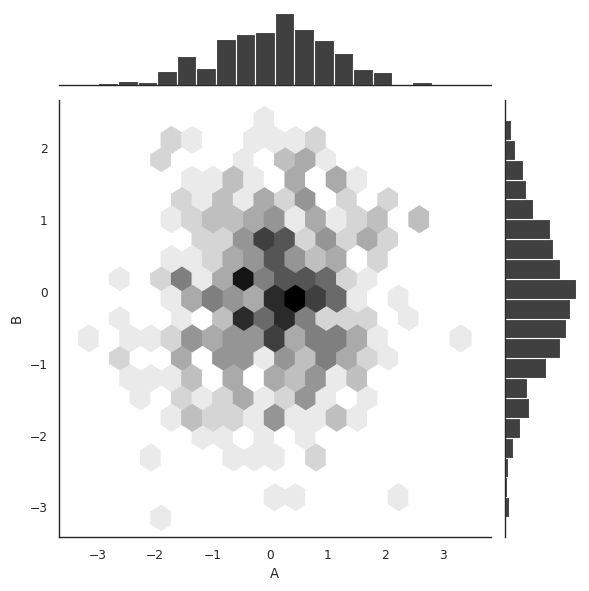

In [47]:
'''
1.综合散点图 - joinplot() 
散点图 + 分布图 
六边形 
'''
df=pd.DataFrame(rs.randn(500,2),columns=['A','B'])

#创建数据 
with sns.axes_style('white'):
    sns.jointplot(
    x=df['A'],
    y=df['B'],  # 设置 XY 轴，显示columns 名称
    data=df,  # 设置数据    
    kind='hex',  # 设置类型 ： 'scatter','reg','resid','kde','hex'
    color='k',
    marginal_kws=dict(bins=20)
)

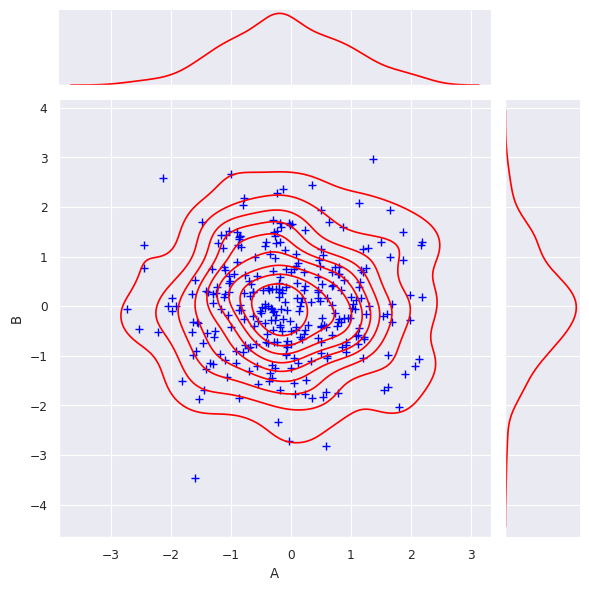

In [52]:
'''
1.综合散点图 - joinplot() 
散点图 + 分布图 
密度图 

'''
rs=np.random.RandomState(15) 
df=pd.DataFrame(rs.randn(300,2),columns=['A','B'])
# 创建数据 

g=sns.jointplot( 
    x=df['A'],
    y=df['B'],
    data=df,
    kind='kde',
    color='r',
    shade_lowest=False 
)
# 创建密度图 
g.plot_joint(plt.scatter,c='b',s=30,linewidth=1,marker='+')

In [57]:
'''
1.综合散点图 - JoinGrid() 
# 可拆分绘制的散点图 
plot_joint() + ax_marg_x.hist() + ax_marg_y.hist() 
'''
sns.set_style('white')
# 设置风格 

# tips=sns.load_dataset('tips')
tips=pd.read_csv('tips.csv')
print(tips.head())
# 导入数据 


   total_bill   tip     sex smoker  day    time  size 
0       16.99  1.01  Female     No  Sun  Dinner      2
1       10.34  1.66    Male     No  Sun  Dinner      3
2       21.01  3.50    Male     No  Sun   Lunch      3
3       23.68  3.31    Male    Yes  Sat  Dinner      2
4       24.59  3.61  Female     No  Sun  Dinner      4


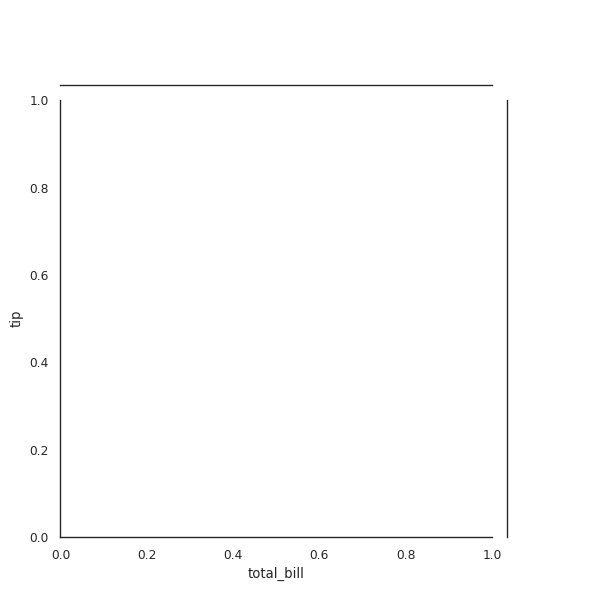

In [59]:

sns.JointGrid(x='total_bill',y='tip',data=tips) 
# 创建一个绘图表格区域，设置好x,y对应数据 


In [ ]:

g.plot_joint(plt.scatter,color='m',edgecolor='white') # 设置框内图表 ，scatter
g.ax_marg_x.hist(tips['total_bill'],color='b',alpha=.6
                bins=np.arange(0,60,3)) # 设置x轴直方图，注意bins是数组 
g.ax_marg_y.histt(tips['tip'],color='r',alpha=.6,
                 orientation='horizontal', 
                 bins=np.arange(0,12,1 )) # 设置y轴直方图，注意需要orientation参数 